## Preliminary EDA 

- Using preliminary partial data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# read in the csv from process_data folder
mice = pd.read_csv("../process_data/aggregate_results_new.csv")


In [10]:
mice.head()

,Unnamed: 0,frac_in_arms_frac_in_closedAndMiddle,frac_in_arms_frac_in_closedArms,frac_in_arms_frac_in_middle,frac_in_arms_frac_in_openArms,frames_in_arms_CL,frames_in_arms_CR,frames_in_arms_M,frames_in_arms_OB,frames_in_arms_OT,...,total_distance_OT,total_smoothed_distance_CL,total_smoothed_distance_CR,total_smoothed_distance_F1,total_smoothed_distance_F2,total_smoothed_distance_F3,total_smoothed_distance_F4,total_smoothed_distance_M,total_smoothed_distance_OB,total_smoothed_distance_OT
0,0,0.433902,0.418157,0.015746,0.196939,7067,680,4,49,205,...,1641.147605,1719.089710,2818.812637,693.708814,951.394362,53.624267,556.384736,4.918801,449.802497,1654.519417
1,1,0.818833,0.740621,0.078212,0.123710,2319,3693,486,634,514,...,1439.326881,5498.155816,7341.057103,0.000000,0.000000,0.000000,0.056469,773.528824,669.720907,1436.769486
2,2,0.891195,0.825250,0.065945,0.066963,2465,4343,280,416,140,...,117.779643,3598.565867,4927.241930,0.000000,2.357997,0.000000,0.000000,470.354952,201.386108,118.056637
3,3,0.750444,0.627953,0.122491,0.202602,1649,2104,762,439,2694,...,1628.239498,3298.054565,4716.975749,0.000000,0.000000,0.000000,0.000000,969.240118,496.735446,1628.297569
4,4,0.592669,0.542912,0.049758,0.243411,1143,1839,69,928,515,...,759.242984,2255.723244,2967.040729,218.149584,57.564323,0.000000,2.423953,292.024996,974.702956,760.062561


### Deal with directory names

In [11]:
mice['outer_directory'].head(12)

0         20121116_153006_EPM_BW_224_F
1         20121116_161742_EPM_BW_734_M
2     20121121_151056_EPM_BWPOF2_767_F
3     20121121_152045_EPM_BWPOF2_770_F
4           20121121_154633_EPM_PO_759
5         20121121_154633_EPM_PO_759_F
6           20121121_155926_EPM_PO_760
7         20121121_160958_EPM_PO_758_F
8     20121130_163816_EPM_BWPOF1_784_M
9     20121207_154246_EPM_BWPOF2_799_M
10    20121217_165902_EPM_BWPOF1_823_F
11    20121217_171649_EPM_BWPOF1_824_M
Name: outer_directory, dtype: object

In [12]:
#split up folder name into separate fields and join to mice df
folder_name = mice["outer_directory"].str.split("_", n = 5, expand = True) 
# TODO formatting some of the column types
mice["date"] = folder_name[0]
mice["time"] = folder_name[1]
# ignore column 2, just "EPM" string
mice["strain"] = folder_name[3]
mice["mouse_id"] = folder_name[4]
mice["sex"] = folder_name[5]

# remove old folder string column
mice.drop(columns=["outer_directory"], inplace=True)

# reorder columns to be at the front
column_order = mice.columns.tolist()
column_order = column_order[-5:] + column_order[:-5]
mice = mice[column_order]

In [13]:
mice.head()

,date,time,strain,mouse_id,sex,Unnamed: 0,frac_in_arms_frac_in_closedAndMiddle,frac_in_arms_frac_in_closedArms,frac_in_arms_frac_in_middle,frac_in_arms_frac_in_openArms,...,total_distance_OT,total_smoothed_distance_CL,total_smoothed_distance_CR,total_smoothed_distance_F1,total_smoothed_distance_F2,total_smoothed_distance_F3,total_smoothed_distance_F4,total_smoothed_distance_M,total_smoothed_distance_OB,total_smoothed_distance_OT
0,20121116,153006,BW,224,F,0,0.433902,0.418157,0.015746,0.196939,...,1641.147605,1719.089710,2818.812637,693.708814,951.394362,53.624267,556.384736,4.918801,449.802497,1654.519417
1,20121116,161742,BW,734,M,1,0.818833,0.740621,0.078212,0.123710,...,1439.326881,5498.155816,7341.057103,0.000000,0.000000,0.000000,0.056469,773.528824,669.720907,1436.769486
2,20121121,151056,BWPOF2,767,F,2,0.891195,0.825250,0.065945,0.066963,...,117.779643,3598.565867,4927.241930,0.000000,2.357997,0.000000,0.000000,470.354952,201.386108,118.056637
3,20121121,152045,BWPOF2,770,F,3,0.750444,0.627953,0.122491,0.202602,...,1628.239498,3298.054565,4716.975749,0.000000,0.000000,0.000000,0.000000,969.240118,496.735446,1628.297569
4,20121121,154633,PO,759,None,4,0.592669,0.542912,0.049758,0.243411,...,759.242984,2255.723244,2967.040729,218.149584,57.564323,0.000000,2.423953,292.024996,974.702956,760.062561


### Summary Stats

In [7]:
mice.shape

(72, 61)

In [8]:
mice.columns

Index([u'date', u'time', u'strain', u'mouse_id', u'sex', u'Unnamed: 0',
       u'frac_in_arms_frac_in_closedAndMiddle',
       u'frac_in_arms_frac_in_closedArms', u'frac_in_arms_frac_in_middle',
       u'frac_in_arms_frac_in_openArms', u'frames_in_arms_CL',
       u'frames_in_arms_CR', u'frames_in_arms_M', u'frames_in_arms_OB',
       u'frames_in_arms_OT', u'inner_directory', u'median_speed_CL',
       u'median_speed_CR', u'median_speed_F1', u'median_speed_F2',
       u'median_speed_F3', u'median_speed_F4', u'median_speed_M',
       u'median_speed_OB', u'median_speed_OT', u'smoothed_median_speed_CL',
       u'smoothed_median_speed_CR', u'smoothed_median_speed_F1',
       u'smoothed_median_speed_F2', u'smoothed_median_speed_F3',
       u'smoothed_median_speed_F4', u'smoothed_median_speed_M',
       u'smoothed_median_speed_OB', u'smoothed_median_speed_OT',
       u'tot_arm_entries_CL', u'tot_arm_entries_CR', u'tot_arm_entries_F1',
       u'tot_arm_entries_F2', u'tot_arm_entries_F3', u'to

In [9]:
# open and closed arms across sex and strain
mice.groupby(['strain', 'sex'])['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms'].mean()

frac_in_arms_frac_in_openArms  frac_in_arms_frac_in_closedArms
strain sex                                                                
BW     F                         0.098515                         0.743280
       M                         0.123710                         0.740621
BWPOF1 F                         0.178368                         0.680747
       M                         0.080634                         0.834762
BWPOF2 F                         0.112740                         0.780668
       M                         0.117361                         0.762388
PO     F                         0.251411                         0.611233
       M                         0.114810                         0.783119

### Fraction in Arms

g = sns.factorplot("strain", "frac_in_arms_frac_in_openArms", data=mice, kind="box")
g.set_axis_labels("Strain", "Fraction in Open Arms");

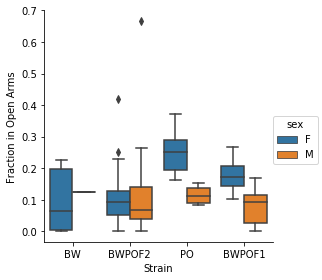

In [10]:
p = sns.factorplot("strain", "frac_in_arms_frac_in_openArms", 'sex', data=mice, kind="box")
p.set_axis_labels("Strain", "Fraction in Open Arms");

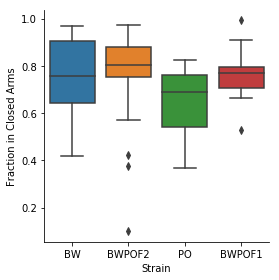

In [11]:
p = sns.factorplot("strain", "frac_in_arms_frac_in_closedArms", data=mice, kind="box")
p.set_axis_labels("Strain", "Fraction in Closed Arms");

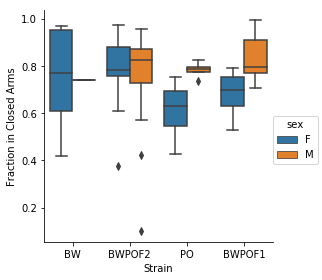

In [24]:
p = sns.factorplot("strain", "frac_in_arms_frac_in_closedArms", "sex", data=mice, kind="box")
p.set_axis_labels("Strain", "Fraction in Closed Arms");

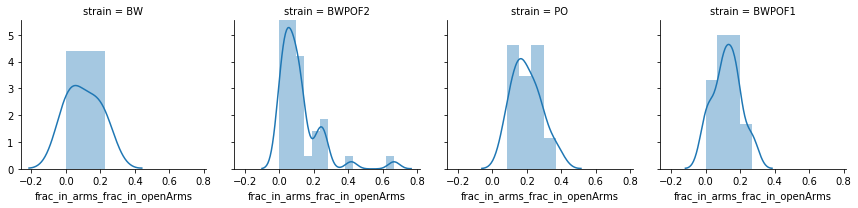

In [31]:
g = sns.FacetGrid(mice, col="strain")
g.map(sns.distplot, "frac_in_arms_frac_in_openArms")

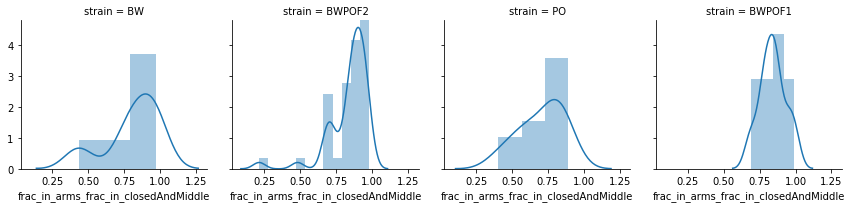

In [32]:
g = sns.FacetGrid(mice, col="strain")
g.map(sns.distplot, "frac_in_arms_frac_in_closedAndMiddle")

### Median Speeds Distribution Plots by Zone and Strain

/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


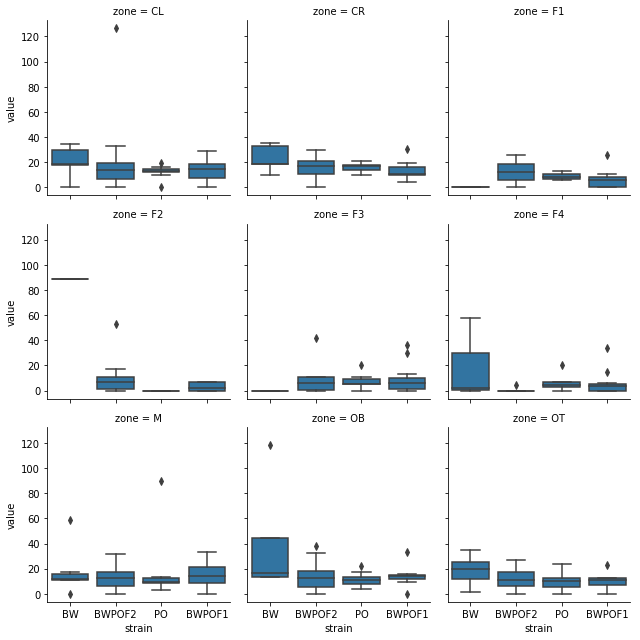

In [13]:
Median_Speeds = mice[['sex', 'strain','median_speed_CL','median_speed_CR', 'median_speed_F1', 'median_speed_F2', 'median_speed_F3', 'median_speed_F4', 
                     'median_speed_M','median_speed_OB', 'median_speed_OT']]
med_speeds = pd.melt(Median_Speeds, id_vars = ['sex', 'strain'], var_name = 'Median_Speeds')
med_speeds['zone']= med_speeds.Median_Speeds.apply(lambda x: str(x).split('_')[2])


med_speeds2 = med_speeds[med_speeds.value < 150]
g = sns.FacetGrid(med_speeds2, col="zone", col_wrap=3)
g.map(sns.boxplot, "strain", "value");

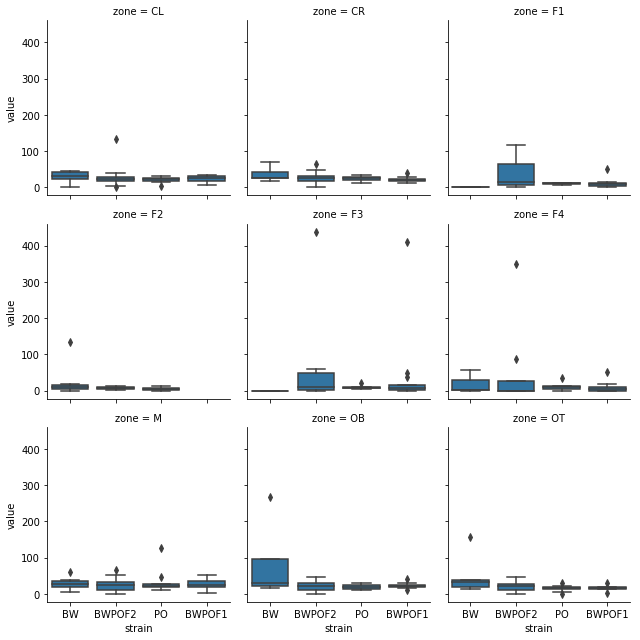

In [14]:
Smoothed_Median_Speeds = mice[['sex', 'strain','smoothed_median_speed_CL','smoothed_median_speed_CR', 'smoothed_median_speed_F1',
                      'smoothed_median_speed_F2', 'smoothed_median_speed_F3', 'smoothed_median_speed_F4', 
                     'smoothed_median_speed_M','smoothed_median_speed_OB', 'smoothed_median_speed_OT']]
sm_med_speeds = pd.melt(Smoothed_Median_Speeds, id_vars = ['sex', 'strain'], var_name = 'Smoothed_med_Speeds')
sm_med_speeds['zone']= sm_med_speeds.Smoothed_med_Speeds.apply(lambda x: str(x).split('_')[3])

sm_med_speeds2 = sm_med_speeds[sm_med_speeds.value < 500]
g = sns.FacetGrid(sm_med_speeds2, col="zone", col_wrap=3)
g.map(sns.boxplot, "strain", "value");

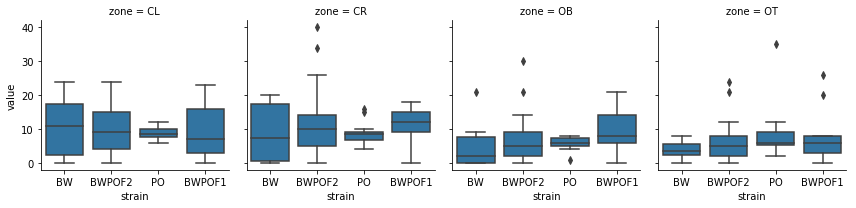

In [22]:
arm_entries = mice[['sex', 'strain','tot_arm_entries_CL', 'tot_arm_entries_CR', 
                    'tot_arm_entries_OB','tot_arm_entries_OT']]
arm_entries = pd.melt(arm_entries, id_vars = ['sex', 'strain'], var_name = 'Tot_Arm_Entries')
arm_entries['zone']= arm_entries.Tot_Arm_Entries.apply(lambda x: str(x).split('_')[3])

g = sns.FacetGrid(arm_entries, col="zone", col_wrap=4)
g.map(sns.boxplot, "strain", "value");

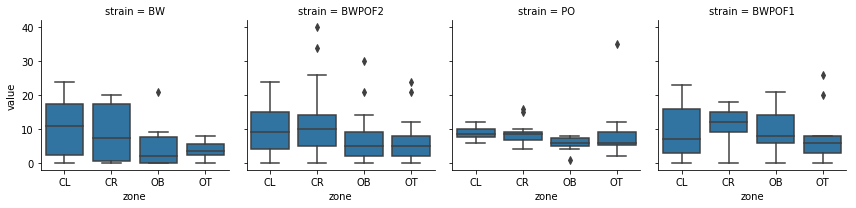

In [23]:
g = sns.FacetGrid(arm_entries, col="strain", col_wrap=4)
g.map(sns.boxplot, "zone", "value");

### Distance Traveled

In [40]:
tot_dist = mice [['sex', 'strain','total_distance_CL', 'total_distance_CR', 'total_distance_F1',
                 'total_distance_F2', 'total_distance_F3', 'total_distance_F4',
                 'total_distance_M', 'total_distance_OB',  'total_distance_OT']]

tot_dist = pd.melt(tot_dist, id_vars = ['sex', 'strain'], var_name = 'Tot_Distance')
tot_dist['zone']= tot_dist.Tot_Distance.apply(lambda x: str(x).split('_')[2])


tot_sm_dist = mice [['sex', 'strain','total_smoothed_distance_CL', 'total_smoothed_distance_CR',
                       'total_smoothed_distance_F1', 'total_smoothed_distance_F2',
                       'total_smoothed_distance_F3', 'total_smoothed_distance_F4',
                       'total_smoothed_distance_M', 'total_smoothed_distance_OB',
                       'total_smoothed_distance_OT']]
tot_sm_dist  = pd.melt(tot_sm_dist, id_vars = ['sex', 'strain'], var_name = 'Tot_SM_Distance')
tot_sm_dist ['zone']= tot_sm_dist.Tot_SM_Distance.apply(lambda x: str(x).split('_')[3])

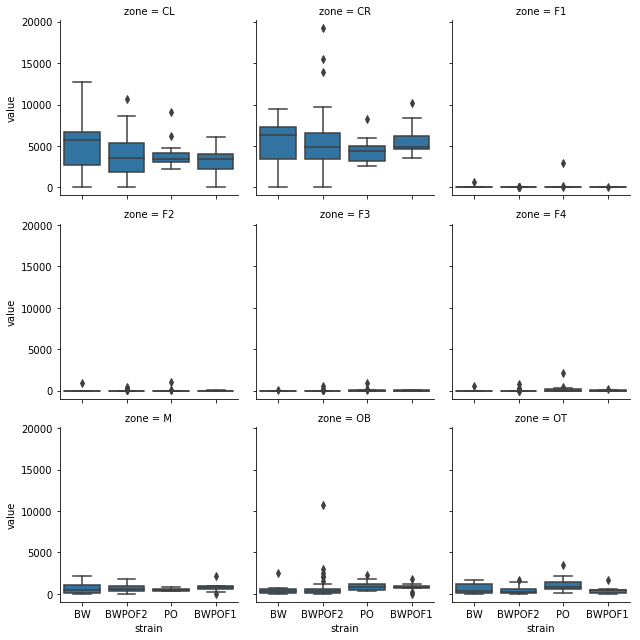

In [42]:
g = sns.FacetGrid(tot_dist, col="zone", col_wrap=3)
g.map(sns.boxplot, "strain", "value");

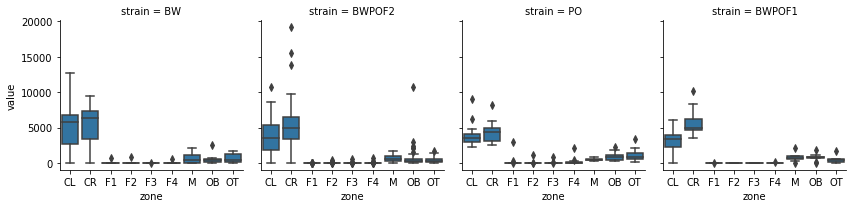

In [44]:
g = sns.FacetGrid(tot_dist, col="strain", col_wrap=4)
g.map(sns.boxplot, "zone", "value");

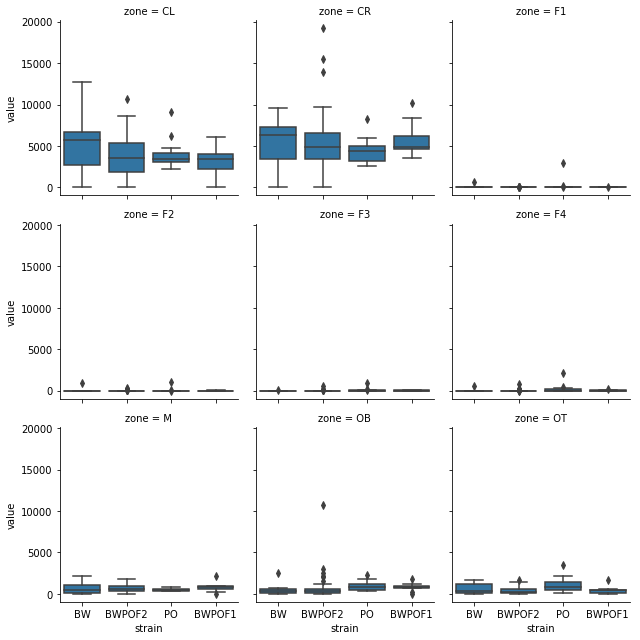

In [46]:
g = sns.FacetGrid(tot_sm_dist, col="zone", col_wrap=3)
g.map(sns.boxplot, "strain", "value");

### Two-Way Interactions

#### Fac in Closed vs Middle

In [47]:
['sex', 'strain', 'frac_in_arms_frac_in_closedArms', 'frac_in_arms_frac_in_middle']

['sex',
 'strain',
 'frac_in_arms_frac_in_closedArms',
 'frac_in_arms_frac_in_middle']

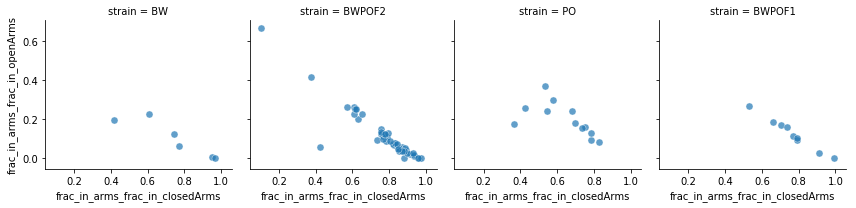

In [14]:
g = sns.FacetGrid(mice, col="strain")
g.map(plt.scatter, "frac_in_arms_frac_in_closedArms", "frac_in_arms_frac_in_openArms", s=50, alpha=.7, linewidth=.5, edgecolor="white")


In [ ]:
g = sns.PairGrid(mice)
g.map(plt.scatter)